In [17]:
import os
import sys

sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.image import imread

from utils.data import load_mat
from utils.visualization import *

data_path = '../data/'
results_path = '../results/'

### Load Images

In [18]:
rec_das_phantom = load_mat(os.path.join(results_path, 'das_phantom.mat'))
rec_apact_phantom = load_mat(os.path.join(results_path, 'apact_phantom.mat'))
rec_wiener_phantom = load_mat(os.path.join(results_path, 'sb_wiener_phantom.mat'))    
rec_das_invivo = load_mat(os.path.join(results_path, 'das_invivo.mat'))
rec_apact_invivo = load_mat(os.path.join(results_path, 'apact_invivo.mat'))
rec_wiener_invivo = load_mat(os.path.join(results_path, 'sb_wiener_invivo.mat'))   

img_phantom = imread('leaf_phantom.jpg')
img_mouse = imread('mouse.jpg')
img_mouse = img_mouse[24:1024,16:1016,:]

In [19]:
[rec_das_phantom, rec_apact_phantom, rec_wiener_phantom] = [standardize(img) for img in [rec_das_phantom, rec_apact_phantom, rec_wiener_phantom]]
[rec_das_invivo, rec_apact_invivo, rec_wiener_invivo] = [standardize(img) for img in [rec_das_invivo, rec_apact_invivo, rec_wiener_invivo]]

### Create Figure

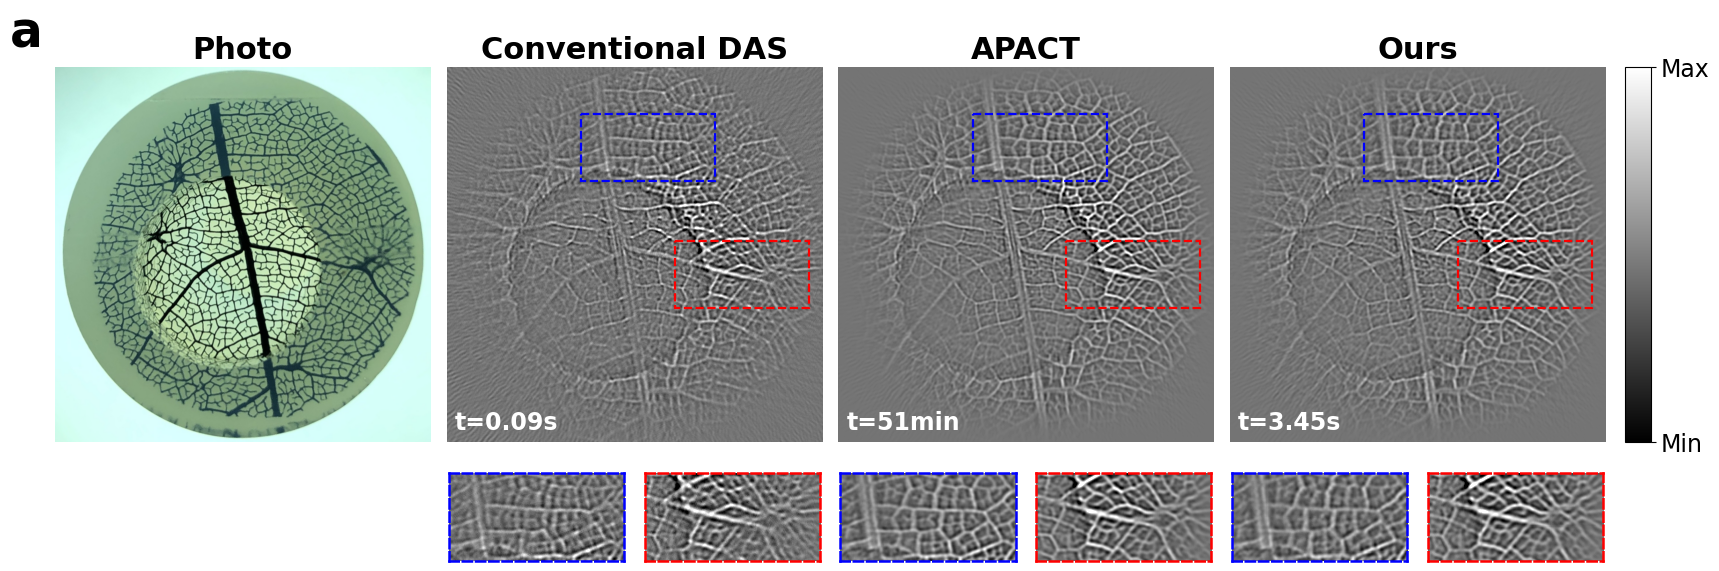

In [20]:
patches = [(70, 200, 100, 200, 'blue'), (260, 340, 100, 200, 'red')]

fig = plt.figure(figsize=(20, 6.6))
gs = gridspec.GridSpec(5, 16)
norm = Normalize(vmax=6, vmin=-5)
for idx, (img, method, time) in enumerate(zip([img_phantom, rec_das_phantom, rec_apact_phantom, rec_wiener_phantom],
                                              ['Photo', 'Conventional DAS', 'APACT', 'Ours'],
                                              [None, 't=0.09s', 't=51min', 't=3.45s'])):
    ax = plt.subplot(gs[0:4,idx*4:(idx+1)*4])
    plt.title(method, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img)
        plt.title('a', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
        continue
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=12, y=540, fontweight='semibold', fontsize=17, color='white')
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[4:5,idx*4+k*2:idx*4+(k+1)*2])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.set_ticks([6, -5])
cb.set_ticklabels(['Max', 'Min'], fontsize=17)

plt.savefig('figure_phantom.png', bbox_inches='tight', dpi=256)

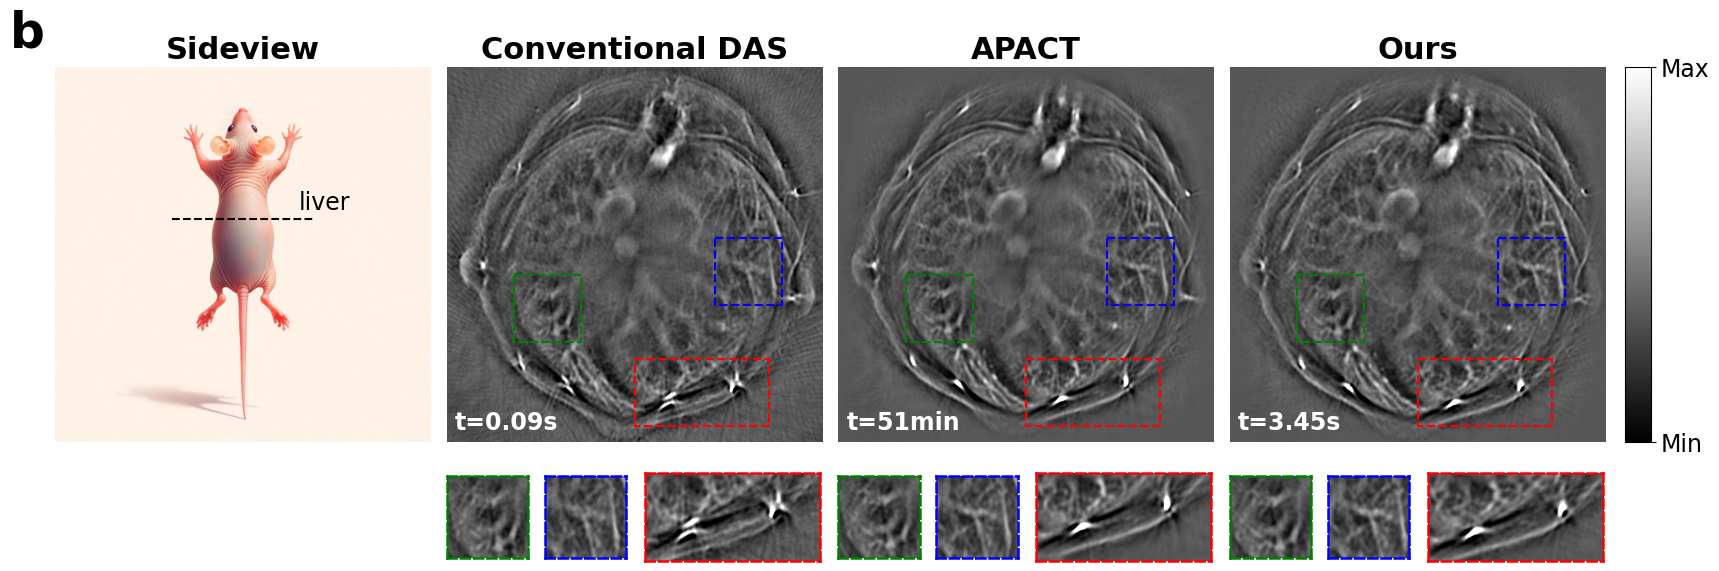

In [21]:
patches = [(310, 100, 100, 100, 'green'), (255, 400, 100, 100,'blue'), (435, 280, 100, 200, 'red')]

fig = plt.figure(figsize=(20, 6.6))
gs = gridspec.GridSpec(5, 16)
norm = Normalize(vmax=7, vmin=-3.5)
for idx, (img, method, time) in enumerate(zip([img_mouse, rec_das_invivo, rec_apact_invivo, rec_wiener_invivo], \
                                             ['Sideview', 'Conventional DAS', 'APACT', 'Ours'],
                                             [None, 't=0.09s', 't=51min', 't=3.45s'])):
    ax = plt.subplot(gs[0:4,idx*4:(idx+1)*4])
    plt.title(method, fontsize=22, fontweight='semibold')
    plt.axis('off')
    if idx == 0:
        plt.imshow(img)
        # ax.set_xlim(0, 10)
        ax.hlines([405], 310, 690, colors='black', linestyles='--', linewidth=1.5)
        plt.text(x=650, y=380, s='liver', fontsize=17, color='black')
        plt.title('b', loc='left', x=-0.12, y=1.03, fontsize=35, fontweight='semibold', color='black')
        continue
    plt.imshow(img, cmap='gray', norm=norm)
    plt.text(s=time, x=12, y=540, fontweight='semibold', fontsize=17, color='white')
    
    for k, (x, y, h, w, color) in enumerate(patches):
        rect = plt.Rectangle((y, x), w, h, fill=False, edgecolor=color, linewidth=1.6, linestyle='--')
        ax.add_patch(rect)
        ax2 = plt.subplot(gs[4:5,idx*4+k:idx*4+k+1+(k==2)])
        plt.imshow(img[x:x+h, y:y+w], cmap='gray', norm=norm)
        plt.xticks([])
        plt.yticks([])
        for loc in ['bottom', 'top', 'left', 'right']:
            ax2.spines[loc].set_color(color)
            ax2.spines[loc].set_linewidth(1.8)
            ax2.spines[loc].set_linestyle('--')
        
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.013, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.set_ticks([7, -3.5])
cb.set_ticklabels(['Max', 'Min'], fontsize=17)

plt.savefig('figure_invivo.png', bbox_inches='tight', dpi=256)